# Covid Inferential Statistics

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import numpy as np

## Loading Data

In [4]:
df = pd.read_csv('covid_19_indonesia_time_series_all.csv')
df

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,41,...,-6.204699,0.18,3.60,0.00,1.84,0.18,51.28%,105.13%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,41,...,-6.204699,0.18,3.78,0.00,1.84,0.18,48.78%,100.00%,1.00,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.00,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,2,0,3,...,0.511648,0.16,0.33,0.00,0.00,0.00,0.00%,150.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,41,...,-6.204699,0.18,3.96,0.00,1.84,0.18,46.51%,95.35%,1.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21754,12/2/2021,ID-SA,Sulawesi Utara,2,0,0,2,34715,1056,33566,...,1.259638,0.76,13140.24,0.00,399.71,39.97,3.04%,96.69%,NaN,1.0
21755,12/2/2021,ID-SB,Sumatera Barat,4,0,0,4,89849,2152,87605,...,-0.850253,0.72,16279.22,0.00,389.91,38.99,2.40%,97.50%,4.00,1.0
21756,12/2/2021,ID-SS,Sumatera Selatan,4,0,0,4,59937,3071,56830,...,-3.216212,0.49,7293.78,0.00,373.71,37.37,5.12%,94.82%,4.00,1.0
21757,12/2/2021,ID-SU,Sumatera Utara,4,0,1,3,106045,2889,103061,...,2.191894,0.27,7129.13,0.00,194.22,19.42,2.72%,97.19%,1.00,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21759 entries, 0 to 21758
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         21759 non-null  object 
 1   Location ISO Code            21759 non-null  object 
 2   Location                     21759 non-null  object 
 3   New Cases                    21759 non-null  int64  
 4   New Deaths                   21759 non-null  int64  
 5   New Recovered                21759 non-null  int64  
 6   New Active Cases             21759 non-null  int64  
 7   Total Cases                  21759 non-null  int64  
 8   Total Deaths                 21759 non-null  int64  
 9   Total Recovered              21759 non-null  int64  
 10  Total Active Cases           21759 non-null  int64  
 11  Location Level               21759 non-null  object 
 12  City or Regency              0 non-null      float64
 13  Province        

## Preprocessing Data

In [18]:
df['Date'] = pd.to_datetime(df['Date'])
#df['Date'] = df['Date'].dt.date
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21759 entries, 0 to 21758
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date                         21759 non-null  datetime64[ns]
 1   Location ISO Code            21759 non-null  object        
 2   Location                     21759 non-null  object        
 3   New Cases                    21759 non-null  int64         
 4   New Deaths                   21759 non-null  int64         
 5   New Recovered                21759 non-null  int64         
 6   New Active Cases             21759 non-null  int64         
 7   Total Cases                  21759 non-null  int64         
 8   Total Deaths                 21759 non-null  int64         
 9   Total Recovered              21759 non-null  int64         
 10  Total Active Cases           21759 non-null  int64         
 11  Location Level               21759 non-nu

In [28]:
jatim = df[
    (df['Location'] == 'Jawa Timur')
]

jatim

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
115,2020-03-18,ID-JI,Jawa Timur,7,1,0,6,18,33,215,...,-7.723346,0.17,0.44,0.02,0.82,0.08,183.33%,1194.44%,NaN,NaN
127,2020-03-19,ID-JI,Jawa Timur,3,0,0,3,21,33,215,...,-7.723346,0.07,0.52,0.00,0.82,0.08,157.14%,1023.81%,0.43,0.0
142,2020-03-20,ID-JI,Jawa Timur,9,0,0,9,30,33,215,...,-7.723346,0.22,0.74,0.00,0.82,0.08,110.00%,716.67%,3.00,1.0
157,2020-03-21,ID-JI,Jawa Timur,9,1,0,8,39,34,215,...,-7.723346,0.22,0.96,0.02,0.84,0.08,87.18%,551.28%,1.00,NaN
172,2020-03-22,ID-JI,Jawa Timur,14,0,0,14,53,34,215,...,-7.723346,0.35,1.31,0.00,0.84,0.08,64.15%,405.66%,1.56,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21607,2021-11-28,ID-JI,Jawa Timur,33,0,27,6,399368,29693,369466,...,-7.723346,0.82,9866.05,0.00,733.54,73.35,7.43%,92.51%,1.06,0.0
21641,2021-11-29,ID-JI,Jawa Timur,10,1,15,-6,399378,29694,369481,...,-7.723346,0.25,9866.30,0.02,733.57,73.36,7.44%,92.51%,0.30,NaN
21674,2021-11-30,ID-JI,Jawa Timur,35,3,33,-1,399413,29697,369514,...,-7.723346,0.86,9867.16,0.07,733.64,73.36,7.44%,92.51%,3.50,3.0
21707,2021-12-01,ID-JI,Jawa Timur,30,0,12,18,399443,29697,369526,...,-7.723346,0.74,9867.90,0.00,733.64,73.36,7.43%,92.51%,0.86,0.0


In [29]:
jatim_daily = jatim[['New Cases', 'New Deaths', 'New Recovered', 'New Active Cases']].groupby(jatim['Date']).sum()
jatim_daily

,New Cases,New Deaths,New Recovered,New Active Cases
Date,,,,
2020-03-18,7,1,0,6
2020-03-19,3,0,0,3
2020-03-20,9,0,0,9
2020-03-21,9,1,0,8
2020-03-22,14,0,0,14
...,...,...,...,...
2021-11-28,33,0,27,6
2021-11-29,10,1,15,-6
2021-11-30,35,3,33,-1


In [31]:
jatim_daily.describe().T

,count,mean,std,min,25%,50%,75%,max
New Cases,625.0,639.1472,1133.691565,0.0,196.0,303.0,572.0,8230.0
New Deaths,625.0,47.4640,74.768654,0.0,15.0,24.0,38.0,409.0
New Recovered,625.0,590.9152,964.991810,0.0,165.0,308.0,538.0,5997.0
New Active Cases,625.0,0.7680,634.777201,-2654.0,-74.0,-3.0,63.0,6021.0


Jatim Daily New Deaths
- Mean: 47,4640
- Std: 74,768654

std adalah ukuran besarnya perbedaan dari nilai sampel terhadap rata-rata
- Semakin tinggi std, rentang variasi data thdp rata2 semakin tinggi
- Semakin rendah std, rentang variasi data thdp rata2 semakin rendah

<AxesSubplot:ylabel='New Deaths'>

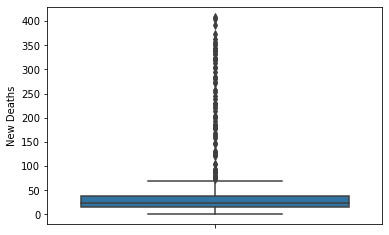

In [32]:
sns.boxplot(data=jatim_daily, y='New Deaths')

<AxesSubplot:ylabel='New Cases'>

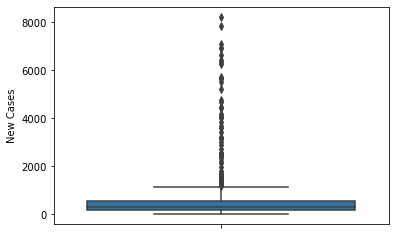

In [33]:
sns.boxplot(data=jatim_daily, y='New Cases')

Rata-rata kasus baru harian covid di Jawa Timur adalah 639.1472. Berdasarkan data tersebut dapat dibuat hipotesis berupa:
```
2 tail
- H0 = Rata-rata kasus baru harian covid Jatim = 600
- H1 = Rata-rata kasus baru harian covid Jatim != 600
```
atau
```
right tail
- H0 : Rata-rata kasus baru harian covid Jatim <= 600
- H1 : Rata-rata kasus baru harian covid Jatim > 600
```

## Data Processing
### T-test 1 sample 2 tailed

In [95]:
t_stat,p_val = stats.ttest_1samp(jatim_daily['New Cases'], 600)

print('P-value:', p_val)
print('T-statistics:', t_stat)

P-value: 0.38832163986178336
T-statistics: 0.863268308688499


Nilai P = 0.38 dimana alfa yang ditetapkan adalah 0.05. Sehingga data yang digunakan memiliki signifikansi yang rendah karena nilai P > alfa.

Karena nilai P != 0,05, maka H0 ditolak. Kesimpulannya adalah H1.

T-stats menjelaskan seberapa jauh H1 dengan H0

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


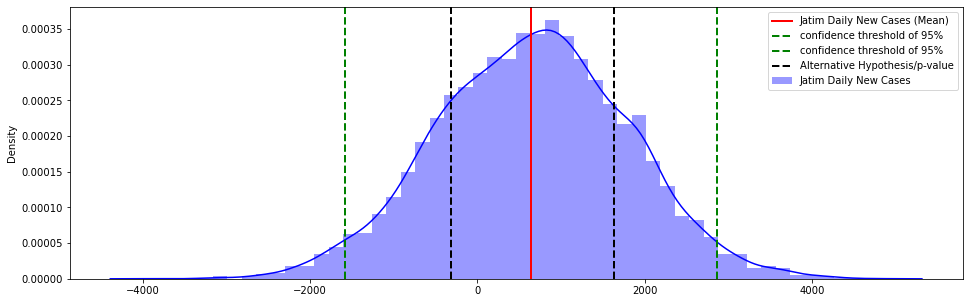

In [81]:
# simulasi
pop = np.random.normal(jatim_daily['New Cases'].mean(), jatim_daily['New Cases'].std(), 10000)  # harus lebih besar dari sample data (jatim_daily)

# confidence interval with critical value 0.05
ci = stats.norm.interval(0.95, jatim_daily['New Cases'].mean(), jatim_daily['New Cases'].std())

plt.figure(figsize=(16,5))

# memvisualisasikan simulasi pdf
sns.distplot(pop, label='Jatim Daily New Cases', color='blue')
plt.axvline(jatim_daily['New Cases'].mean(), color='red', linewidth=2, label='Jatim Daily New Cases (Mean)')

# membuat garis confidence interval
plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')

# membuat garis p-value/alternative hypotesis
plt.axvline(pop.mean() + t_stat*pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis/p-value')
plt.axvline(pop.mean() - t_stat*pop.std(), color='black', linestyle='dashed', linewidth=2)
plt.legend()

### T-test 2 sample 1 tailed

Apakah kasus baru harian covid di Jateng lebih besar dari Jatim?

In [84]:
# Slicing Jateng daily cases
jateng = df[
    (df['Location'] == 'Jawa Tengah')
]

jateng_daily = jateng[['New Cases', 'New Deaths', 'New Recovered', 'New Active Cases']].groupby(jateng['Date']).sum()
jateng_daily.describe().T

,count,mean,std,min,25%,50%,75%,max
New Cases,635.0,766.039370,1126.674630,0.0,100.5,340.0,872.5,6660.0
New Deaths,635.0,47.587402,90.803840,0.0,5.0,15.0,41.0,544.0
New Recovered,635.0,716.266142,1187.871062,0.0,78.0,275.0,785.5,7977.0
New Active Cases,635.0,2.185827,719.954958,-5664.0,-90.5,13.0,163.5,3091.0


In [85]:
jatim_daily.describe().T

,count,mean,std,min,25%,50%,75%,max
New Cases,625.0,639.1472,1133.691565,0.0,196.0,303.0,572.0,8230.0
New Deaths,625.0,47.4640,74.768654,0.0,15.0,24.0,38.0,409.0
New Recovered,625.0,590.9152,964.991810,0.0,165.0,308.0,538.0,5997.0
New Active Cases,625.0,0.7680,634.777201,-2654.0,-74.0,-3.0,63.0,6021.0


Jateng Daily New Cases
- Mean: 766.039370
- Std: 1126.674630

Jatim Daily New Cases
- Mean: 639.1472
- Std: 1133.691565

#### Hypothesis testing T-Test 2 Sample 1 Tailed

- H0 = Mean New Cases from Jatim <= Mean New Cases from Jateng
- H1 = Mean New Cases from Jatim > Mean New Cases from Jateng

In [86]:
# t-test 2 sample 1 tailed
t_stat, p_val = stats.ttest_ind(jatim_daily['New Cases'], jateng_daily['New Cases']) # default H1 = n0 > n1

# ttest_ind is 2-tailed, so half the resulting p-value to get a 1-tailed p-value
print('P-value:',p_val/2)
print('t-statistics:',t_stat)

P-value: 0.02325646339731219
t-statistics: -1.992673934389798


C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-1225.609482740385


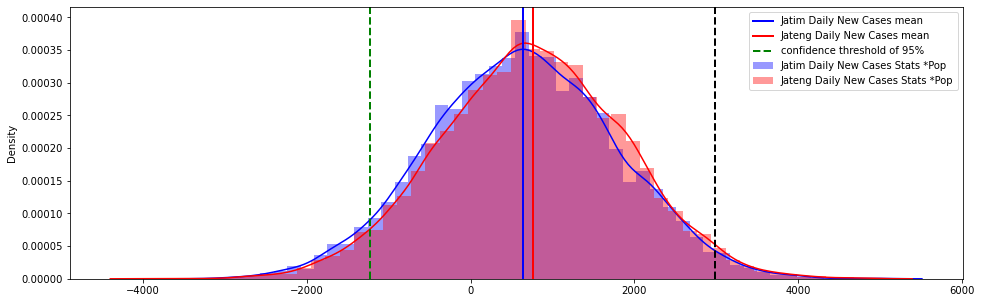

In [91]:
# simulation
jatim_daily_pop = np.random.normal(jatim_daily['New Cases'].mean(), jatim_daily['New Cases'].std(), 10000)
jateng_daily_pop = np.random.normal(jateng_daily['New Cases'].mean(), jateng_daily['New Cases'].std(), 10000)

# confidence interval based on jatim
# used cv = 0.05 since 1 tailed, confidence interval 0.90
ci = stats.norm.interval(0.90, jatim_daily['New Cases'].mean(), jatim_daily['New Cases'].std())

plt.figure(figsize=(16,5))
sns.distplot(jatim_daily_pop, label='Jatim Daily New Cases Stats *Pop', color='blue')
sns.distplot(jateng_daily_pop, label='Jateng Daily New Cases Stats *Pop', color='red')

# mean
plt.axvline(jatim_daily['New Cases'].mean(), color='blue', linewidth=2, label='Jatim Daily New Cases mean')
plt.axvline(jateng_daily['New Cases'].mean(), color='red',  linewidth=2, label='Jateng Daily New Cases mean')

# plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')

# plt.axvline(gen_1_pop.mean()+t_stat*gen_1_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(jateng_daily_pop.mean()-t_stat*jateng_daily_pop.std(), color='black', linestyle='dashed', linewidth=2)

plt.legend()
print(ci[0])

#### Hypothesis Testing T-Test 2 Sample 2 Tailed
- H0 = Mean New Cases from Jatim = Mean New Cases from Jateng
- H1 = Mean New Cases from Jatim != Mean New Cases from Jateng

In [92]:
# t-test 2 sample 2 tailed
t_stat, p_val = stats.ttest_ind(jatim_daily['New Cases'], jateng_daily['New Cases']) # default H1 = n0 > n1

# ttest_ind is 2-tailed, we dont need to divide by 2
print('P-value:',p_val)
print('t-statistics:',t_stat)

P-value: 0.04651292679462438
t-statistics: -1.992673934389798


C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-1225.609482740385


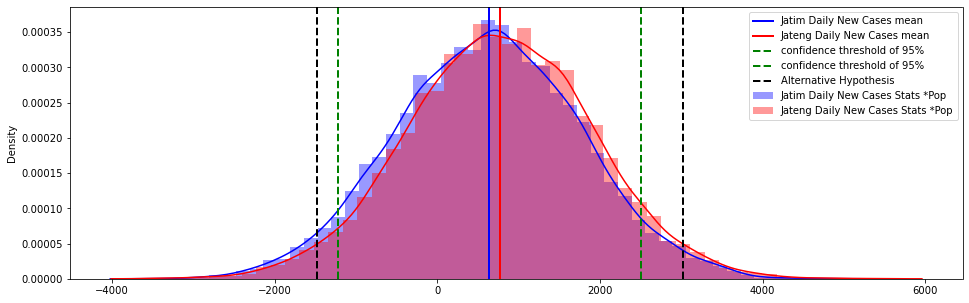

In [93]:
# simulation
jatim_daily_pop = np.random.normal(jatim_daily['New Cases'].mean(), jatim_daily['New Cases'].std(), 10000)
jateng_daily_pop = np.random.normal(jateng_daily['New Cases'].mean(), jateng_daily['New Cases'].std(), 10000)

# confidence interval based on jatim
# used cv = 0.05 since 2 tailed, we use 0.95 as it is
ci = stats.norm.interval(0.90, jatim_daily['New Cases'].mean(), jatim_daily['New Cases'].std())

plt.figure(figsize=(16,5))
sns.distplot(jatim_daily_pop, label='Jatim Daily New Cases Stats *Pop', color='blue')
sns.distplot(jateng_daily_pop, label='Jateng Daily New Cases Stats *Pop', color='red')

# mean
plt.axvline(jatim_daily['New Cases'].mean(), color='blue', linewidth=2, label='Jatim Daily New Cases mean')
plt.axvline(jateng_daily['New Cases'].mean(), color='red',  linewidth=2, label='Jateng Daily New Cases mean')

plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')

plt.axvline(jateng_daily_pop.mean()+t_stat*jateng_daily_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(jateng_daily_pop.mean()-t_stat*jateng_daily_pop.std(), color='black', linestyle='dashed', linewidth=2)

plt.legend()
print(ci[0])